In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

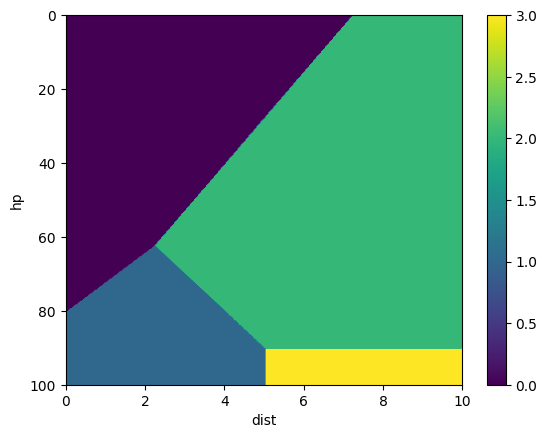

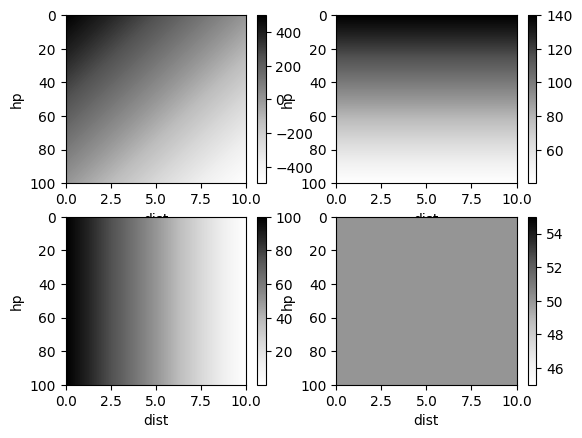

In [4]:

def flee(hp, dist):
    return (100 - hp) * 5 - 50 * dist  + np.random.randn() * 0

def attack(hp, dist):
    return 100 - 10 * dist  + np.random.randn() * 0

def patchup(hp, dist):
    return 140 - hp  + np.random.randn() * 0

def patrol(hp, dist):
    return 50  + np.random.randn() * 0 


HP = np.arange(0, 100, 0.25)
DIST = np.arange(0, 10, 0.025)
img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, hp in enumerate(HP):
    for y, ds in enumerate(DIST):
        utility = np.array([flee(hp, ds), attack(hp, ds), patchup(hp, ds), patrol(hp, ds)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 100, 0])
ax.set_aspect('auto')
ax.set_xlabel("dist")
ax.set_ylabel("hp")


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(4):
    im = ax[i %2, i // 2].imshow(ht[i], extent=[0, 10, 100, 0], cmap='Greys')
    ax[i %2, i // 2].set_aspect('auto')
    ax[i %2, i // 2].set_xlabel("dist")
    ax[i %2, i // 2].set_ylabel("hp")
    plt.colorbar(im)

# Homework

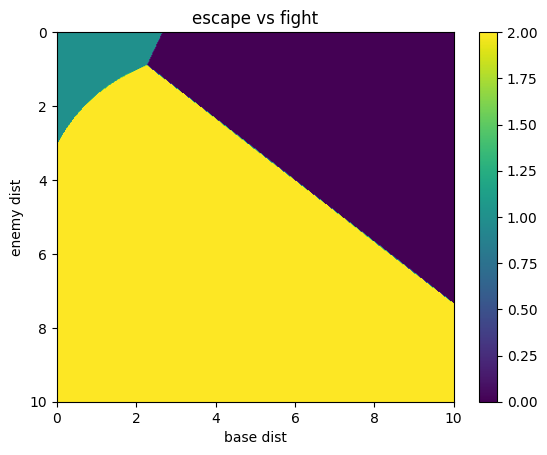

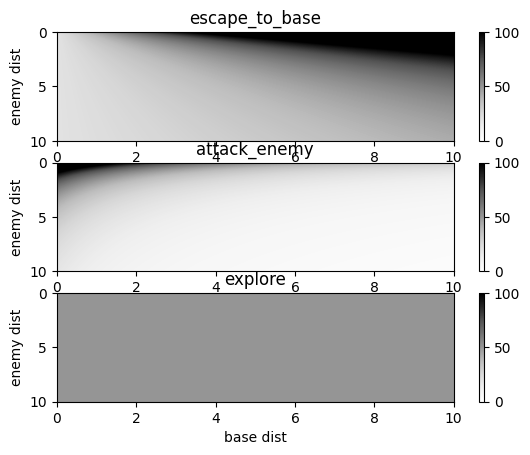

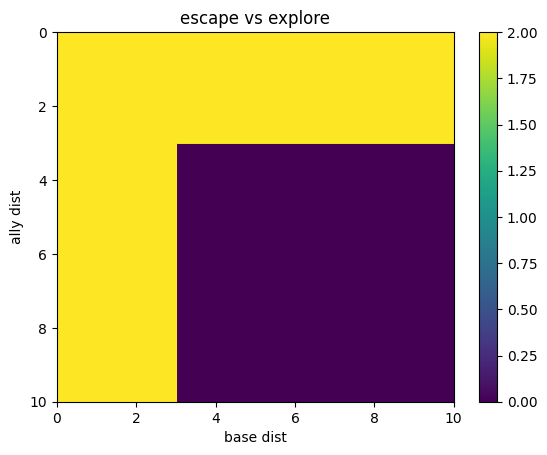

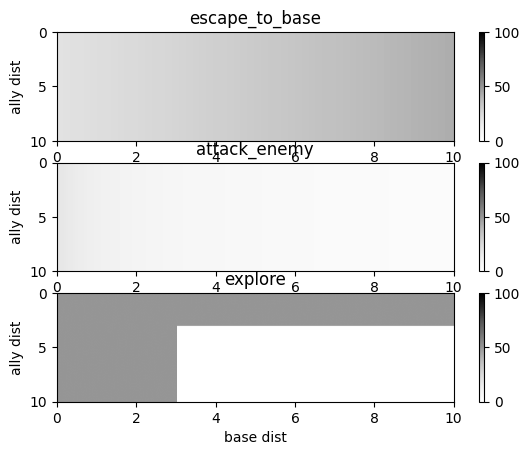

In [9]:
def explore(ally_dist, base_dist):
    return max(50. * (ally_dist <= 3), 50 * (base_dist <= 3))

def escape_to_base(enemy_dist, base_dist):
    return min(100, 20. + 50. * base_dist / (2 * enemy_dist + 2.))

def attack_enemy(enemy_dist, base_dist):
    return min(100, 200. / (enemy_dist + 1.) / (base_dist*.5 + 1.))


ALLY_DIST = np.arange(0, 10, 0.025)
BASE_DIST = np.arange(0, 10, 0.025)
ENEMY_DIST = np.arange(0, 10, 0.025)
ht = np.zeros((3, BASE_DIST.shape[0], ENEMY_DIST.shape[0]))
img = np.zeros((BASE_DIST.shape[0], ENEMY_DIST.shape[0]))

utilities = ["escape_to_base", "attack_enemy", "explore"]

# ========================

for x, bd in enumerate(BASE_DIST):
    for y, ed in enumerate(ENEMY_DIST):
        utility = np.array([escape_to_base(ed, bd), attack_enemy(ed, bd), explore(1, bd)])
        for i in range(utility.shape[0]):
            ht[i][y][x] = utility[i]
        img[y][x] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 10, 0])
ax.set_aspect('auto')
ax.set_xlabel("base dist")
ax.set_ylabel("enemy dist")
ax.set_title("escape vs fight")
plt.colorbar(im)

fig, ax = plt.subplots(3)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, 10, 10, 0], cmap='Greys', vmin=0, vmax=100)
    ax[i].set_aspect('auto')
    ax[i].set_title(utilities[i])
    ax[i].set_xlabel("base dist")
    ax[i].set_ylabel("enemy dist")
    plt.colorbar(im)

# ========================

for x, bd in enumerate(BASE_DIST):
    for y, ad in enumerate(ALLY_DIST):
        utility = np.array([escape_to_base(10., bd), attack_enemy(10, bd), explore(ad, bd)])
        for i in range(utility.shape[0]):
            ht[i][y][x] = utility[i]
        img[y][x] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 10, 0])
ax.set_aspect('auto')
ax.set_xlabel("base dist")
ax.set_ylabel("ally dist")
ax.set_title("escape vs explore")

plt.colorbar(im)

fig, ax = plt.subplots(3)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, 10, 10, 0], cmap='Greys', vmin=0, vmax=100)
    ax[i].set_aspect('auto')
    ax[i].set_title(utilities[i])
    ax[i].set_xlabel("base dist")
    ax[i].set_ylabel("ally dist")
    plt.colorbar(im)